#### _Importing Required Libraries_

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

#### _Exploratory Data Analysis - EDA_

In [2]:
# Facthing the data and creating the DataFrame
dataFrame = pd.read_csv('Dataset/WineQuality.csv')

In [3]:
dataFrame.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataFrame.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Printing the number of Rows & Columns
nRows = dataFrame.shape[0]
nColumns = dataFrame.shape[1]

print('Number of Rows:', nRows)
print('Number of Columns:', nColumns)

Number of Rows: 6497
Number of Columns: 13


In [6]:
# Finding the duplicates values in the DataFrame
dataFrame.duplicated().sum()

1168

In [7]:
# Knowledge of data types and whether they are null or not 
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
# Specifying the Categorical and Numerical Variables
toGetCategoricNumeric = dataFrame.columns.to_series().groupby(dataFrame.dtypes).groups
print(toGetCategoricNumeric)

{int64: ['quality'], float64: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], object: ['type']}


In [9]:
# Summary of numeric features
dataFrame.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.0,6489.0,6494.0,6495.0,6495.0,6497.0,6497.0,6497.0,6488.0,6493.0,6497.0,6497.0
mean,7.2,0.3,0.3,5.4,0.1,30.5,115.7,1.0,3.2,0.5,10.5,5.8
std,1.3,0.2,0.1,4.8,0.0,17.7,56.5,0.0,0.2,0.1,1.2,0.9
min,3.8,0.1,0.0,0.6,0.0,1.0,6.0,1.0,2.7,0.2,8.0,3.0
25%,6.4,0.2,0.2,1.8,0.0,17.0,77.0,1.0,3.1,0.4,9.5,5.0
50%,7.0,0.3,0.3,3.0,0.0,29.0,118.0,1.0,3.2,0.5,10.3,6.0
75%,7.7,0.4,0.4,8.1,0.1,41.0,156.0,1.0,3.3,0.6,11.3,6.0
max,15.9,1.6,1.7,65.8,0.6,289.0,440.0,1.0,4.0,2.0,14.9,9.0


In [10]:
# Checking the rows with missing values
dataFrame.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

In [11]:
# Independent variable's values count
dataFrame['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
# Applying the pearson correlation to find the correlation between features
dataFrame.corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


In [13]:
# Sorting the correlations between Dependent & Independent Veriable
dataFrame.corr(method="pearson").iloc[-1, :].abs().sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265953
chlorides               0.200886
citric acid             0.085706
fixed acidity           0.077031
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038729
residual sugar          0.036825
pH                      0.019366
Name: quality, dtype: float64

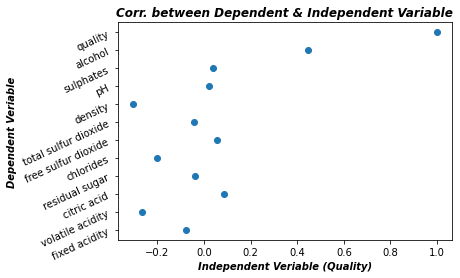

In [14]:
# Visualizing the correlation between dependent & independent variable with the help of the scatter
independentVarCorr = dataFrame.corr(method="pearson").iloc[-1, :]
dependentValueName = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

plt.xlabel("Independent Veriable (Quality)", fontweight="bold", style="italic")
plt.ylabel("Dependent Veriable", fontweight="bold", style="italic")
plt.yticks(rotation = 25)

plt.title("Corr. between Dependent & Independent Variable", fontweight="bold", style="italic")
plt.scatter(independentVarCorr, dependentValueName)
plt.show()

<AxesSubplot:>

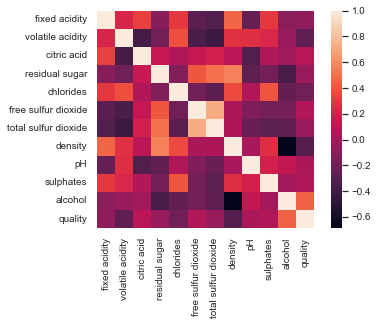

In [15]:
# Drawing a heat map for pearson correlation
sns.set(font_scale=0.9)
sns.heatmap(dataFrame.corr(method="pearson"), cbar=True, square=True)

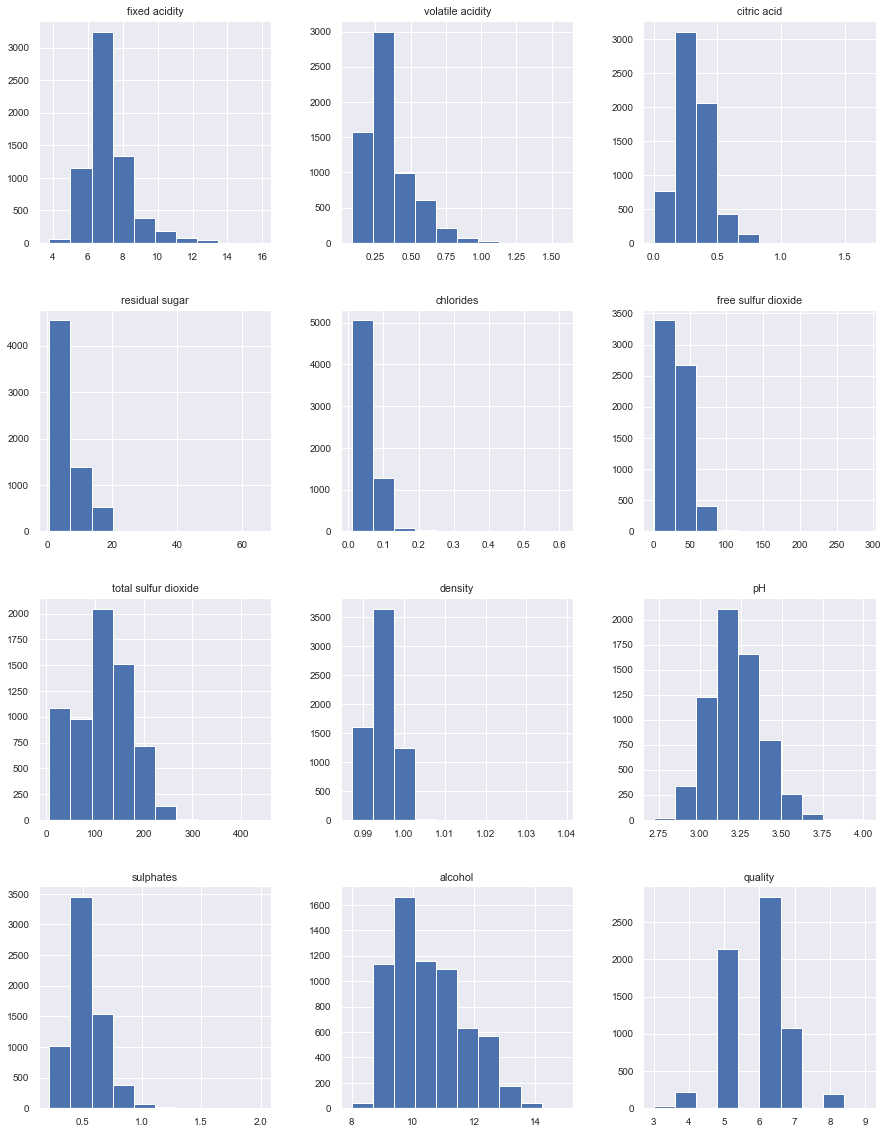

In [16]:
# Drawing a histogram for each numeric feature
dataFrame.hist(figsize=(15,20))
plt.show()

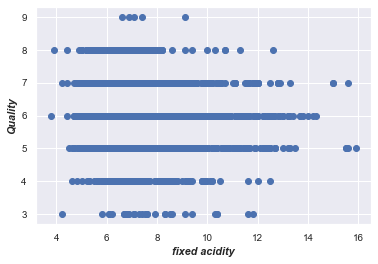

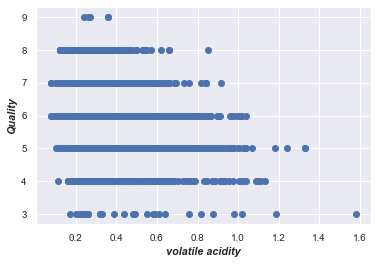

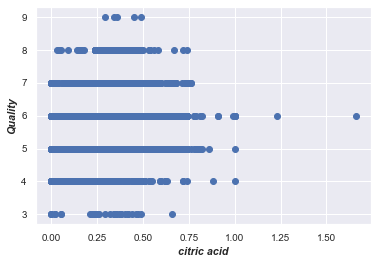

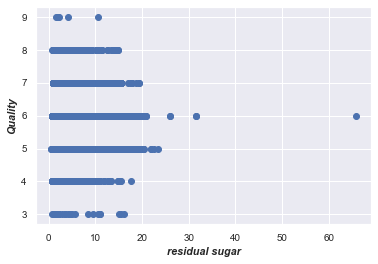

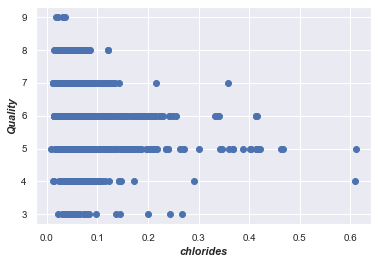

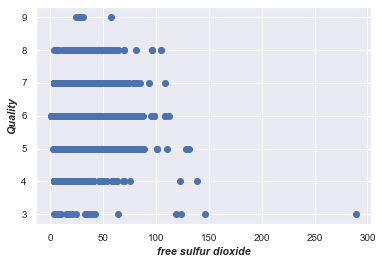

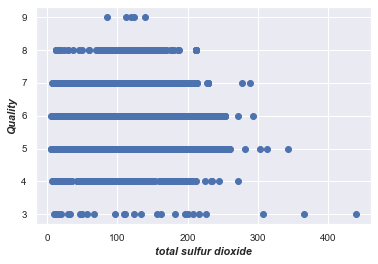

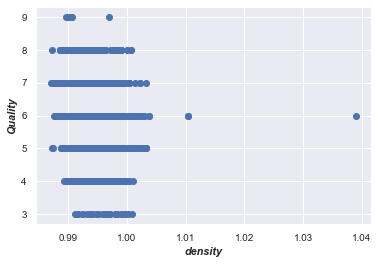

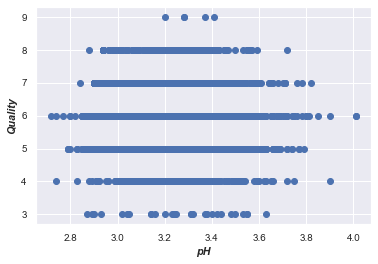

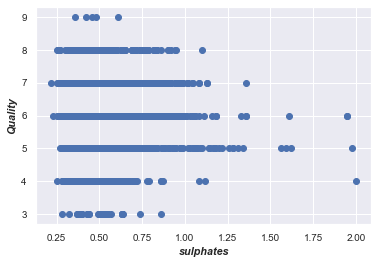

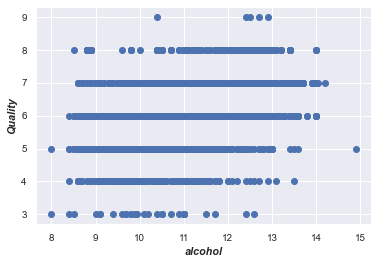

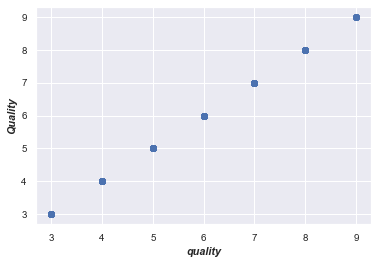

In [17]:
# Visualizing the Data for each Dependent Feature with Independent Features
for data in dependentValueName:
    plt.xlabel(f'{data}', fontweight="bold", style="italic")
    plt.ylabel("Quality", fontweight="bold", style="italic")
    plt.scatter(dataFrame[data], dataFrame['quality'])
    plt.show()

#### _Dealing with Missing Values (Dropping & Imputation)_

In [18]:
# Dealing with missing values and replacing them by their mean
missingColumns = dataFrame.columns[dataFrame.isnull().any()]

for columns in missingColumns:
    dataFrame[columns].fillna(dataFrame[columns].mean(), inplace=True)

In [19]:
# Checking the rows for missing values
dataFrame.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### _Determine correlation after filling in missing values_

In [20]:
# Sorting the correlations between Dependent & Independent Veriable
dataFrame.corr(method="pearson").iloc[-1, :].abs().sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265838
chlorides               0.200818
citric acid             0.085699
fixed acidity           0.076967
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038713
residual sugar          0.036819
pH                      0.019356
Name: quality, dtype: float64

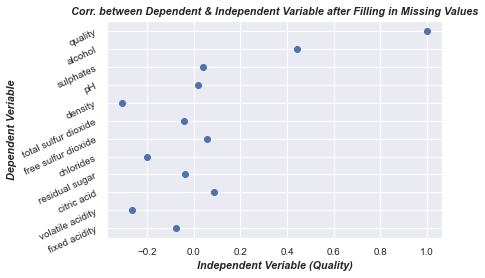

In [21]:
# Visualizing the correlation between dependent & independent variable with the help of the scatter after filling the missing values
independentVarCorr = dataFrame.corr(method="pearson").iloc[-1, :]
dependentValueName = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

plt.xlabel("Independent Veriable (Quality)", fontweight="bold", style="italic")
plt.ylabel("Dependent Veriable", fontweight="bold", style="italic")
plt.yticks(rotation = 25)

plt.title("Corr. between Dependent & Independent Variable after Filling in Missing Values", fontweight="bold", style="italic")
plt.scatter(independentVarCorr, dependentValueName)
plt.show()

In [22]:
# Summary of numeric features after filling the missing values
dataFrame.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0
mean,7.2,0.3,0.3,5.4,0.1,30.5,115.7,1.0,3.2,0.5,10.5,5.8
std,1.3,0.2,0.1,4.8,0.0,17.7,56.5,0.0,0.2,0.1,1.2,0.9
min,3.8,0.1,0.0,0.6,0.0,1.0,6.0,1.0,2.7,0.2,8.0,3.0
25%,6.4,0.2,0.2,1.8,0.0,17.0,77.0,1.0,3.1,0.4,9.5,5.0
50%,7.0,0.3,0.3,3.0,0.0,29.0,118.0,1.0,3.2,0.5,10.3,6.0
75%,7.7,0.4,0.4,8.1,0.1,41.0,156.0,1.0,3.3,0.6,11.3,6.0
max,15.9,1.6,1.7,65.8,0.6,289.0,440.0,1.0,4.0,2.0,14.9,9.0


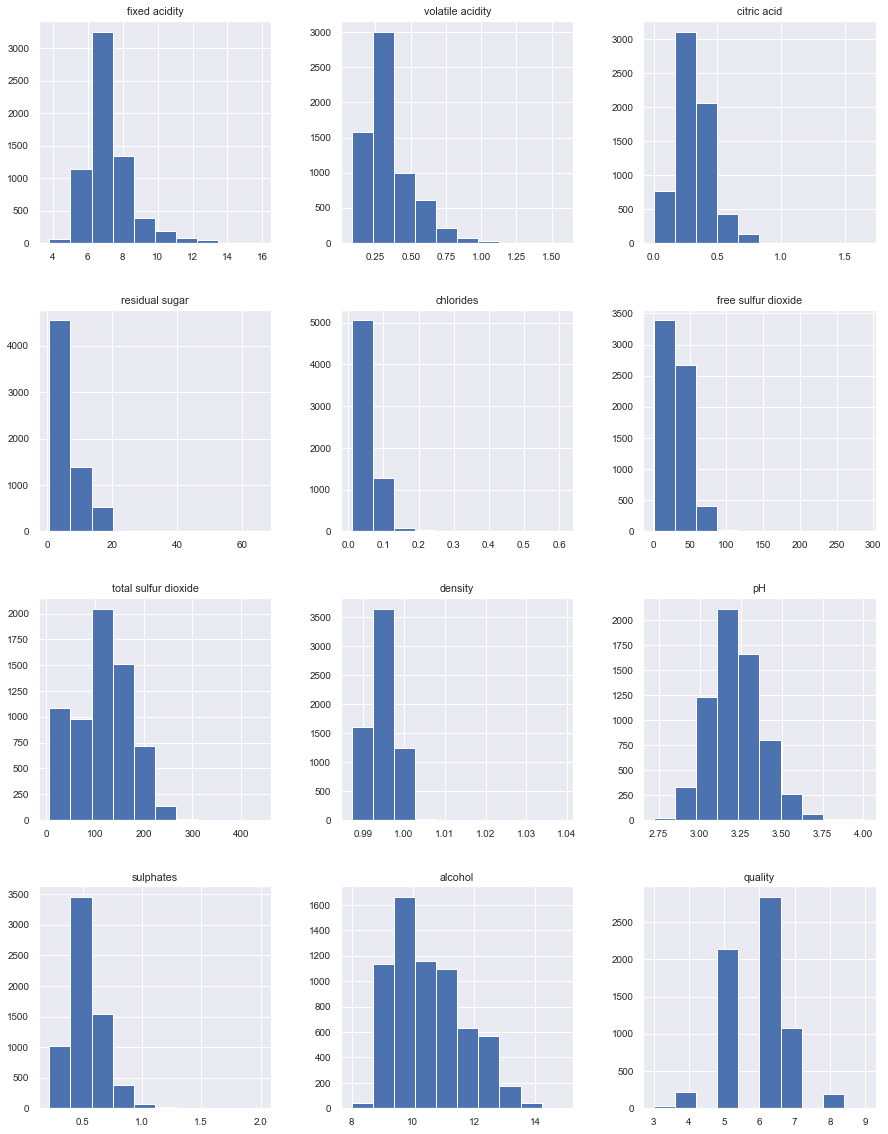

In [23]:
# Drawing a histogram for each numeric feature after filling the missing values
dataFrame.hist(figsize=(15,20))
plt.show()

#### _Creating the new .csv file_

In [24]:
dataFrame.to_csv('Dataset/WineQualityNew.csv', index=False)